# Adi Setiadi Putra (202131023)

# Library

In [1]:
import cv2 as cv # mengimport cv2 dan mengganti cara memanggilnya menjadi cv
import numpy as np # mengimport numpy dan mengganti cara memanggilnya menjadi np
import matplotlib.pyplot as plt # mengimport matplotlib.pyplot dan mengganti cara memanggilnya menjadi plt
%matplotlib inline 
# untuk menampilkan gambar dibawah kode

from skimage import data
from skimage.io import imread # untuk membaca gambar yang diimport
from skimage.color import rgb2gray

# Show Img

shape citra 1 : 0 (228, 221)
shape citra 2 : 0 (213, 236)


Text(0.5, 1.0, 'Citra 2')

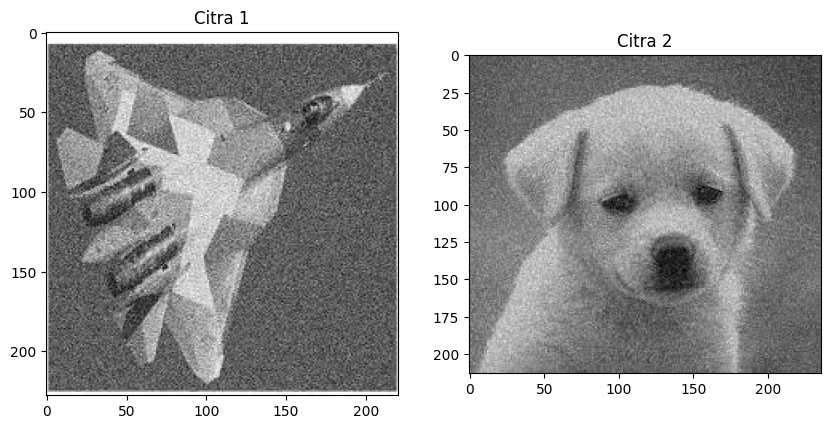

In [2]:
citra1 = imread(fname = 'noisy.jfif.jpg')
citra2 = imread(fname = 'dog.jfif.jpg')

citra1 = cv.cvtColor(citra1, cv.COLOR_RGB2GRAY) #ubah ke gray
citra2 = cv.cvtColor(citra2, cv.COLOR_RGB2GRAY) #ubah ke gray

print("shape citra 1 : 0", citra1.shape) #menampilkan tinggi lebar dari suatu gambar
print("shape citra 2 : 0", citra2.shape) #menampilkan tinggi lebar dari suatu gambar

fig,axes = plt.subplots(1, # ini untuk menampilkan jumlah gambar pada baris
                        2, # ini untuk menampilkan jumlah gambar pada kolom
                        figsize=(10,10)) #unttuk menampilkan angka tinggi lebar pada gambar
ax = axes.ravel()

ax[0].imshow(citra1,cmap = 'gray') # menampilkan gambar dibawah
ax[0].set_title("Citra 1") # nama dari citra yang ditampilkan
ax[1].imshow(citra2,cmap = 'gray') # menampilkan gambar dibawah
ax[1].set_title("Citra 2") # nama dari citra yang akan ditampilkan

# Membuat copy gambar

In [3]:
copyCitra1 = citra1.copy().astype(float) #tipe data harus diubah kedalam bentuk float
copyCitra2 = citra2.copy().astype(float) #tipe data harus diubah kedalam bentuk float

m1,n1 = copyCitra1.shape # m1 = panjang, n1 = lebar
output1 = np.empty([m1,n1])

m2,n2 = copyCitra2.shape
output2 = np.empty([m2,n2])

print('shape copy citra 1 : ', copyCitra1.shape)
print('shape output citra 1 : ', copyCitra1.shape)

print('m1 :', m1)
print('n1 :', n1)

print('shape copy citra 2 : ', copyCitra2.shape)
print('shape output citra 2 : ', copyCitra2.shape)

print('m2 :', m2)
print('n2 :', n2)

shape copy citra 1 :  (228, 221)
shape output citra 1 :  (228, 221)
m1 : 228
n1 : 221
shape copy citra 2 :  (213, 236)
shape output citra 2 :  (213, 236)
m2 : 213
n2 : 236


# Mean Filtering

In [4]:
def mean_filter(image):
    copy_image = image.copy().astype(float)
    m,n = copy_image.shape
    output = np.empty_like(copy_image)
    
    for row in range(1, m-1):
        for col in range(1, n-1):
            total= copy_image[row-1, col-1] + copy_image[row-1, col+1] + \
                   copy_image[row, col-1] + copy_image[row, col] + copy_image[row, col+1] + \
                   copy_image[row+1, col-1] + copy_image[row+1, col] + copy_image[row+1, col+1]
            output[row, col] = total / 9
    return output

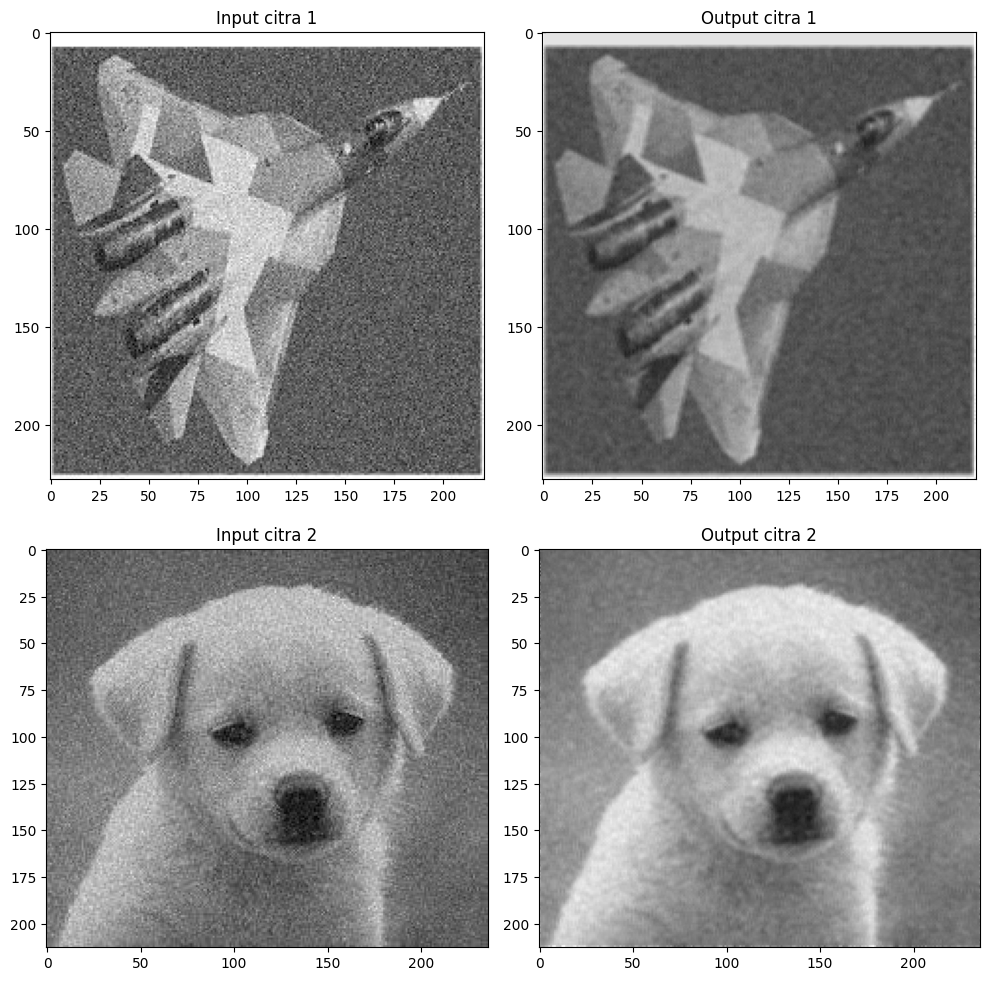

In [5]:
filtered_image1 = mean_filter(copyCitra1)
filtered_image2 = mean_filter(copyCitra2)

fig, axes = plt.subplots(2,2, figsize=(10,10)) # 2,2 karena menggunakan 2 gambar
ax = axes.ravel()

ax[0].imshow(copyCitra1, cmap = 'gray')
ax[0].set_title("Input citra 1")

ax[1].imshow(filtered_image1, cmap = 'gray')
ax[1].set_title("Output citra 1")

ax[2].imshow(copyCitra2, cmap = 'gray')
ax[2].set_title("Input citra 2")

ax[3].imshow(filtered_image2, cmap = 'gray')
ax[3].set_title("Output citra 2")

plt.tight_layout()

# Median Filtering

In [6]:
img_median = cv.imread('noisy.jfif.jpg')
imgg_median = cv.cvtColor(img_median, cv.COLOR_BGR2RGB) # membuat gambarnya menjadi RGB
img_median_after = cv.medianBlur(img_median, 3) # membuat variable baru untuk menampung gambar yang sudah diberi fungsi
                                                # median blur. semakin besar angka yang dimasukkan, maka gambar akan semakin blur

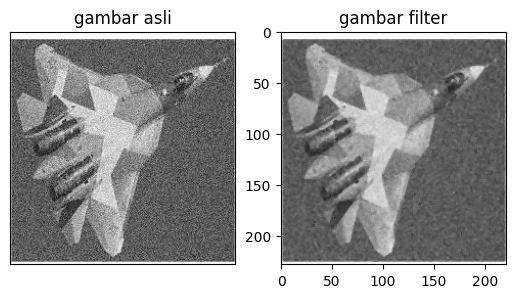

In [7]:
plt.subplot(121), plt.imshow(img_median), plt.title('gambar asli')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_median_after), plt.title('gambar filter')

plt.show()

# Edge Filtering

In [8]:
def filter_batas (data, filter_size):
    temp=[]
    indexer = filter_size
    new_image = data.copy()
    nrow, ncol = data.shape
    
    for i in range(nrow):
        for j in range (ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if(k > -1) and (k < nrow):
                        if(m > -1) and (m < ncol):
                            temp.append(data[k,m])         
            temp.remove(data[i,j])
            max_value = max(temp)
            min_value = min(temp)
            if data[i,j] > max_value:
                new_image[i,j] = max_value
            elif data[i,j] < min_value:
                new_image[i,j] = min_value
            temp = []
        return new_image.copy()

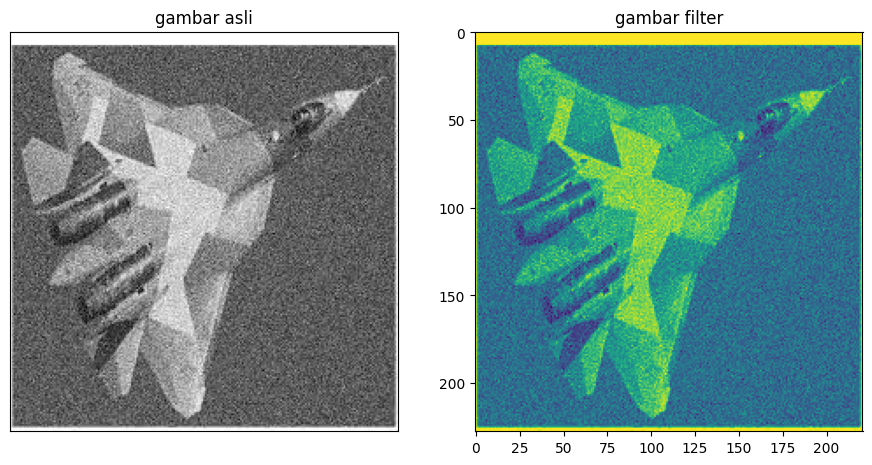

In [10]:
img_batas = cv.imread('noisy.jfif.jpg')
img_batas_gray = cv.cvtColor(img_batas, cv.COLOR_BGR2GRAY)
img_filter_batas = filter_batas(img_batas_gray, 9)

plt.figure(figsize = (11, 6))
plt.subplot(121), plt.imshow(img_batas), plt.title('gambar asli')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filter_batas), plt.title('gambar filter')

plt.show()